<a href="https://colab.research.google.com/github/himanshu2294/GBM_notebook/blob/master/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx
import pandas as pd

In [0]:
df = pd.DataFrame({'indexid': [1,2,3,4,5,6], 'sid': [[11,12,13],[11,24,14],[11,12,24,13,27],[28,15,16],[15,16,13],[28,24,12]]})

In [124]:
d = {}

for i in range(6):
  d[df['indexid'][i]] = df['sid'][i]

d


{1: [11, 12, 13],
 2: [11, 24, 14],
 3: [11, 12, 24, 13, 27],
 4: [28, 15, 16],
 5: [15, 16, 13],
 6: [28, 24, 12]}

In [128]:
df.columns = ['sid','indexid']
df

,sid,indexid
0,1,"[11, 12, 13]"
1,2,"[11, 24, 14]"
2,3,"[11, 12, 24, 13, 27]"
3,4,"[28, 15, 16]"
4,5,"[15, 16, 13]"
5,6,"[28, 24, 12]"


In [0]:
df['Index_edges'] = df['indexid'].apply(lambda x: list(combinations(x,2)))

In [130]:
df

,sid,indexid,Index_edges
0,1,"[11, 12, 13]","[(11, 12), (11, 13), (12, 13)]"
1,2,"[11, 24, 14]","[(11, 24), (11, 14), (24, 14)]"
2,3,"[11, 12, 24, 13, 27]","[(11, 12), (11, 24), (11, 13), (11, 27), (12, ..."
3,4,"[28, 15, 16]","[(28, 15), (28, 16), (15, 16)]"
4,5,"[15, 16, 13]","[(15, 16), (15, 13), (16, 13)]"
5,6,"[28, 24, 12]","[(28, 24), (28, 12), (24, 12)]"


In [0]:
df_new = pd.DataFrame({
   'sid' : df['sid'].values.repeat(df['Index_edges'].str.len()),
    'Index_edges' : list(chain.from_iterable(df['Index_edges'].values.tolist()))
})

In [132]:
df_new

,Index_edges,sid
0,"(11, 12)",1
1,"(11, 13)",1
2,"(12, 13)",1
3,"(11, 24)",2
4,"(11, 14)",2
5,"(24, 14)",2
6,"(11, 12)",3
7,"(11, 24)",3
8,"(11, 13)",3
9,"(11, 27)",3


In [0]:
g2 = nx.MultiGraph()
for i in range(len(df_new.Index_edges)):
  u,v = (df_new.Index_edges[i])
  g2.add_edge(u,v, name = 'sid' , value = (df_new.loc[i,'sid']))
#   nx.set_edge_attributes(g2, )



In [158]:
g2[11]

AdjacencyView({12: {0: {'name': 'sid', 'value': 1}, 1: {'name': 'sid', 'value': 3}}, 13: {0: {'name': 'sid', 'value': 1}, 1: {'name': 'sid', 'value': 3}}, 24: {0: {'name': 'sid', 'value': 2}, 1: {'name': 'sid', 'value': 3}}, 14: {0: {'name': 'sid', 'value': 2}}, 27: {0: {'name': 'sid', 'value': 3}}})

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


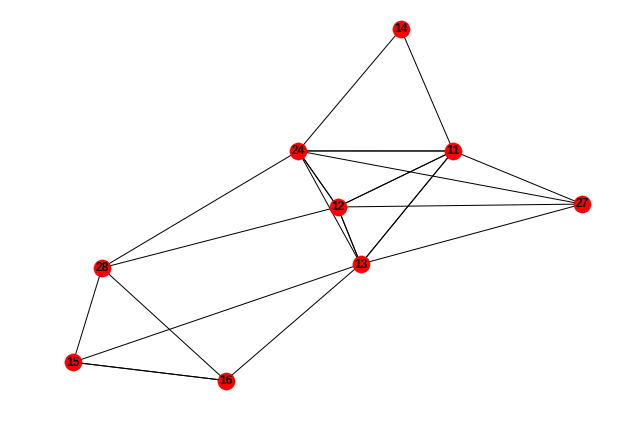

In [156]:
nx.draw(g2, with_labels=True, font_weight='bold')

In [0]:
bb = nx.edge_betweenness_centrality(g2, normalized=False)

In [121]:
(nx.degree_centrality(g2 ))
# nx.in_degree_centrality(g2)

{11: 0.5,
 12: 0.5,
 13: 0.75,
 14: 0.25,
 15: 0.5,
 16: 0.5,
 24: 0.75,
 27: 0.25,
 28: 0.5}

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


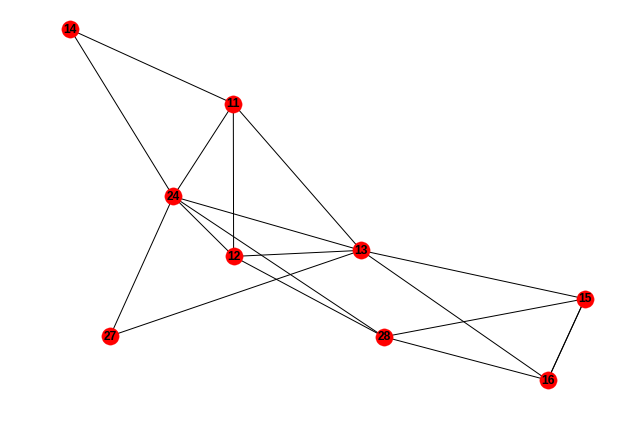

In [76]:
g = nx.MultiGraph()
g.add_edges_from(list(df_new.Index_edges.values))

nx.draw(g, with_labels=True, font_weight='bold')

In [0]:
G = nx.MultiGraph()

for sid in df.indexid:
  

In [0]:
from networkx.algorithms import bipartite

In [53]:
g.is_bipartite()

AttributeError: ignored

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


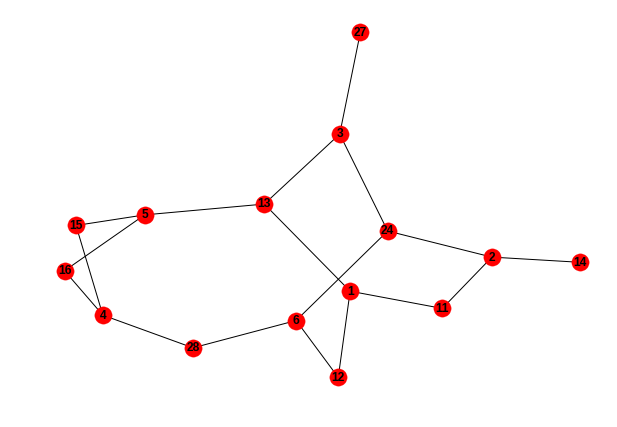

In [31]:
nx.draw(g, with_labels=True, font_weight='bold')

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


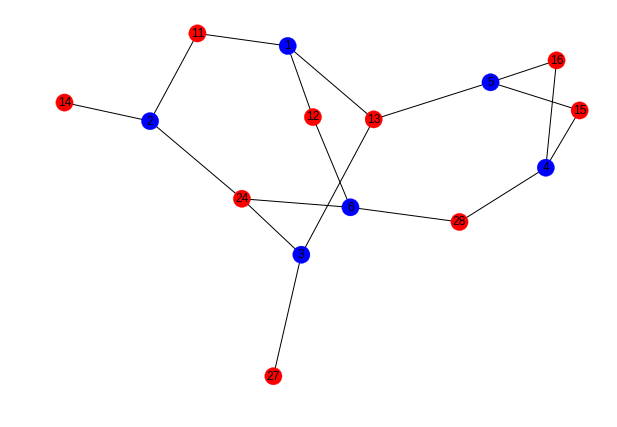

In [44]:
# G = nx.erdos_renyi_graph(20,0.1)
color_map = []
for node in g:
    if node <=6:
        color_map.append('blue')
    else: color_map.append('red')      
nx.draw(g,node_color = color_map,with_labels = True)

In [0]:
nodes